In [1]:
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sys.path.append(os.path.abspath('../scripts'))

In [2]:
from Overview_Analysis import load_data_using_sqlalchemy, calculate_missing_percentage, impute_numerical_columns, drop_columns_with_missing_values
from Experience_Analysis import aggregate_customer_data, visualize_tcp_retransmission, visualize_rtt_and_throughput, visualize_throughput, visualize_throughput_and_tcp_per_handset, process_and_cluster_customers

In [3]:
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")
    
df.sample(7)

Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
66371,7.277826e+18,4/27/2019 0:29,600.0,4/28/2019 0:29,648.0,86400.0,2.082003e+14,3.366558e+10,8.601480e+13,D10575C,...,2830478.0,7221130.0,5830589.0,7416725.0,174165828.0,7084742.0,7521365.0,3480236.0,26292204.0,196070296.0
72853,7.277826e+18,4/27/2019 10:08,445.0,4/28/2019 1:34,378.0,55530.0,2.082017e+14,3.369816e+10,8.637690e+13,T73294C,...,6601892.0,9252670.0,6531798.0,17539775.0,511768085.0,15564509.0,185411765.0,13343282.0,57293693.0,536839297.0
39486,1.304243e+19,4/25/2019 7:51,924.0,4/26/2019 8:03,555.0,87088.0,2.082015e+14,3.367020e+10,3.530741e+13,D93709C,...,15922341.0,12512808.0,2504835.0,18755272.0,631517669.0,8788356.0,526409548.0,2228347.0,46962213.0,654570303.0
95620,7.349883e+18,4/27/2019 10:47,749.0,4/29/2019 15:36,513.0,190120.0,2.082010e+14,3.365020e+10,8.683890e+13,D78784C,...,14657210.0,3334840.0,2407333.0,4228681.0,463876440.0,5014948.0,111951700.0,1430334.0,18019030.0,495124052.0
66268,1.304243e+19,4/27/2019 0:16,123.0,4/28/2019 4:38,920.0,102101.0,2.082018e+14,3.366336e+10,8.637690e+13,L29980C,...,19024919.0,6784104.0,17281811.0,4610206.0,194087786.0,9335665.0,190406977.0,5671635.0,28217157.0,236997131.0
72409,7.277826e+18,4/27/2019 9:51,529.0,4/28/2019 3:21,242.0,62990.0,2.082003e+14,3.369951e+10,3.566781e+13,L10690A,...,7388921.0,10005013.0,15216656.0,5304547.0,763624206.0,1903080.0,259859622.0,7139656.0,25445924.0,792132342.0
14526,7.277826e+18,4/24/2019 20:59,940.0,4/25/2019 2:34,252.0,20080.0,2.082010e+14,3.365938e+10,3.585371e+13,D71939B,...,11524288.0,13558831.0,6914279.0,14053077.0,508511651.0,14272896.0,502804564.0,16143011.0,62223004.0,534864602.0


In [4]:
calculate_missing_percentage(df)

,Missing Values,Percentage
Bearer Id,991,0.660662
Start,1,0.000667
Start ms,1,0.000667
End,1,0.000667
End ms,1,0.000667
Dur. (ms),1,0.000667
IMSI,570,0.379997
MSISDN/Number,1066,0.710662
IMEI,572,0.381331
Last Location Name,1153,0.768662


In [5]:
df = drop_columns_with_missing_values(df)

Columns dropped: 10


In [6]:
df = impute_numerical_columns(df)
df = df.dropna()

Imputed missing values in the following columns: ['Start ms', 'End ms', 'Dur. (ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']


In [7]:
result = aggregate_customer_data(df)
print(result.head())

   MSISDN/Number    Avg RTT  Avg Throughput                    Handset Type
0   3.360100e+10  23.000000            38.0  Huawei P20 Lite Huawei Nova 3E
1   3.360100e+10  15.500000            49.5          Apple iPhone 7 (A1778)
2   3.360100e+10  63.729294            48.5                       undefined
3   3.360101e+10  42.000000           124.0         Apple iPhone 5S (A1457)
4   3.360101e+10  29.750000         14211.0         Apple iPhone Se (A1723)


c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DL TP < 50 Kbps (%)', y='MSISDN/Number', data=top_tcp, palette='Blues_d')


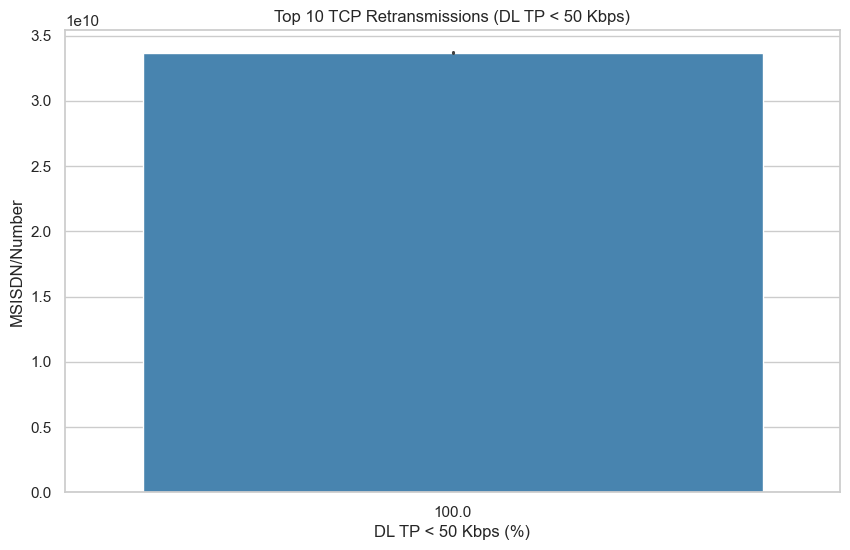

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DL TP < 50 Kbps (%)', y='MSISDN/Number', data=bottom_tcp, palette='Reds_d')


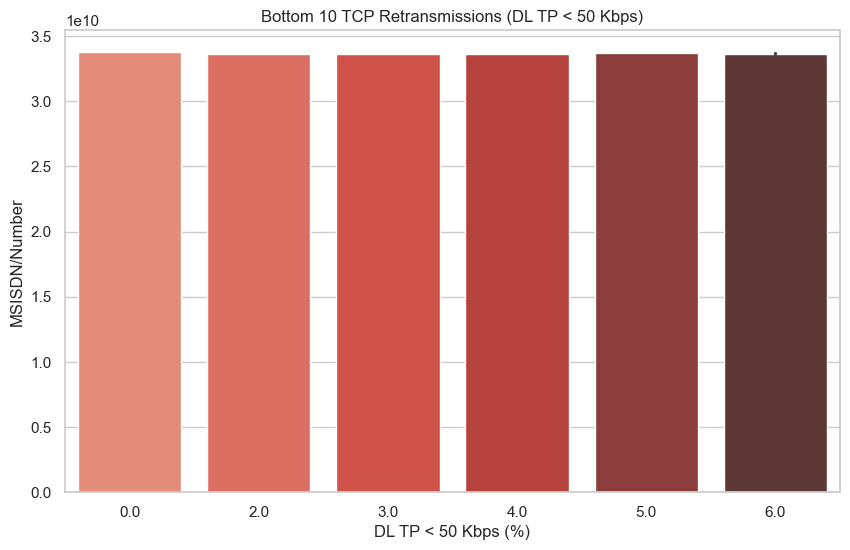

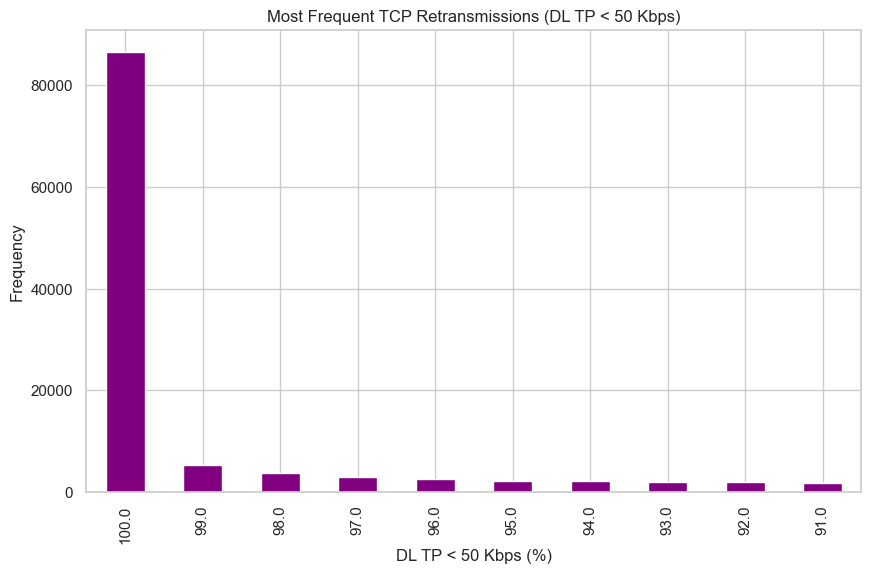

In [8]:
visualize_tcp_retransmission(df)

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg RTT DL (ms)', y='MSISDN/Number', data=top_rtt, palette='Greens_d')


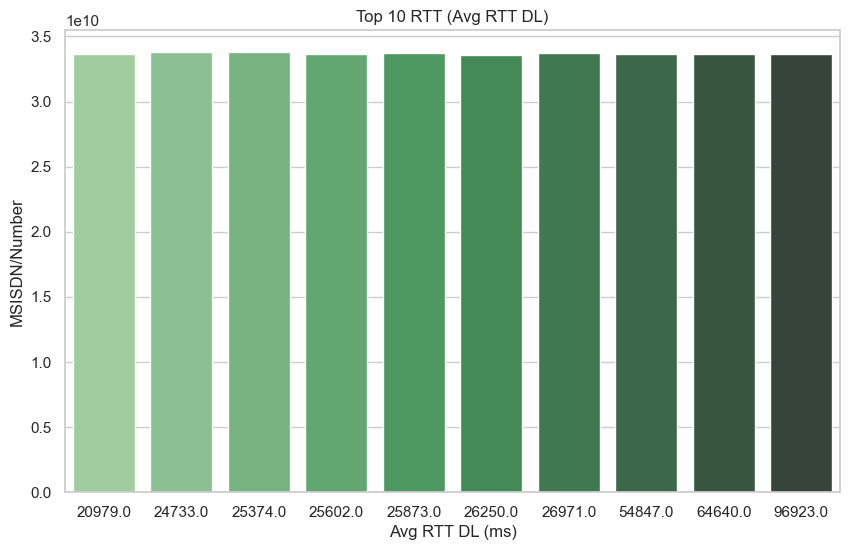

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg RTT DL (ms)', y='MSISDN/Number', data=bottom_rtt, palette='Oranges_d')


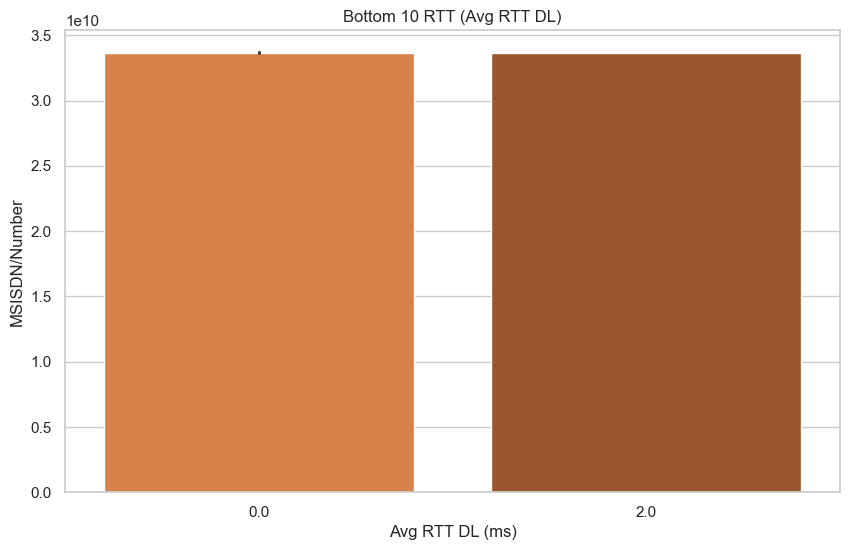

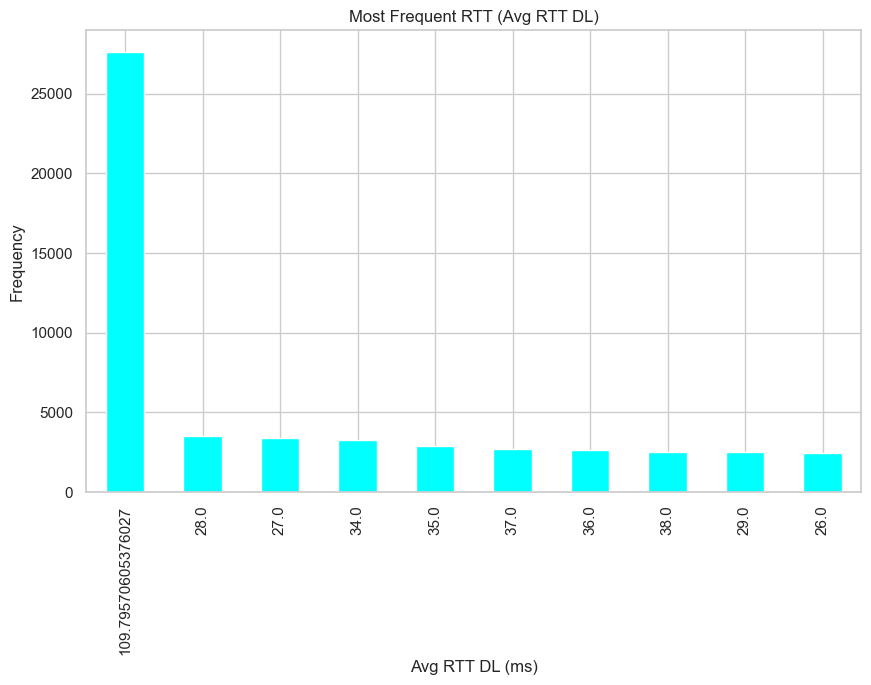

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=top_throughput, palette='Blues_d')


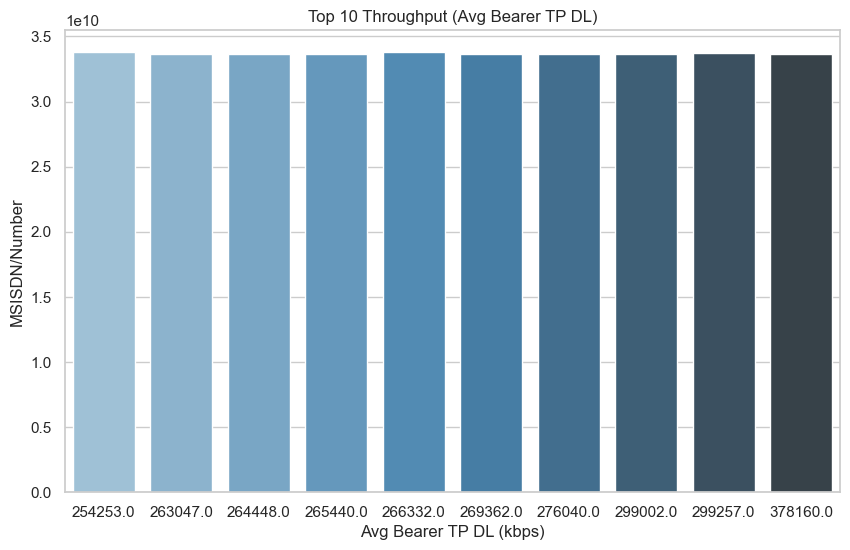

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=bottom_throughput, palette='Reds_d')


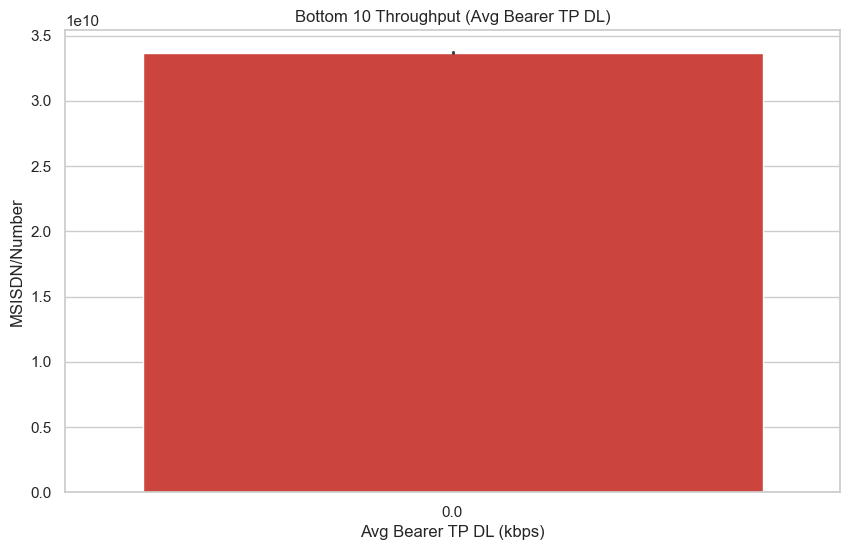

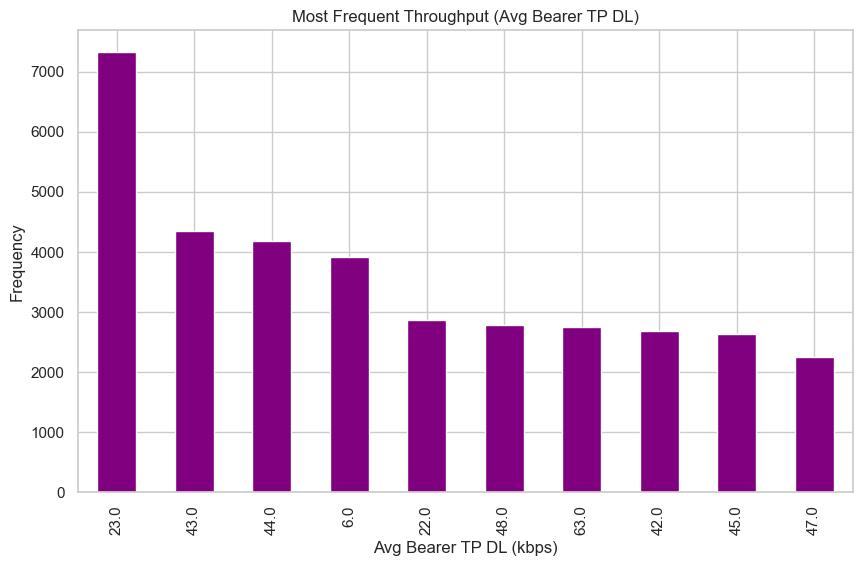

In [9]:
visualize_rtt_and_throughput(df)

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=top_throughput, palette='Purples_d')


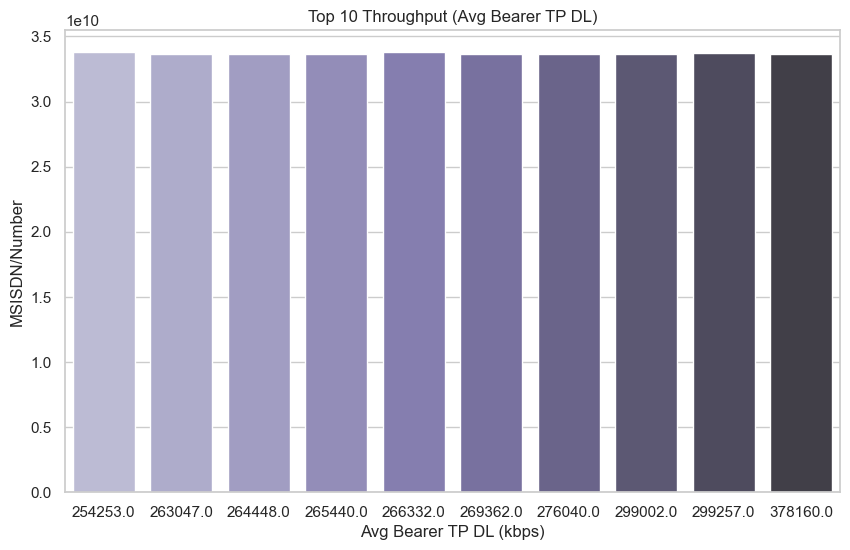

c:\Users\ephre\Documents\Telecommunication-dataset-analysis\scripts\Experience_Analysis.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg Bearer TP DL (kbps)', y='MSISDN/Number', data=bottom_throughput, palette='Reds_d')


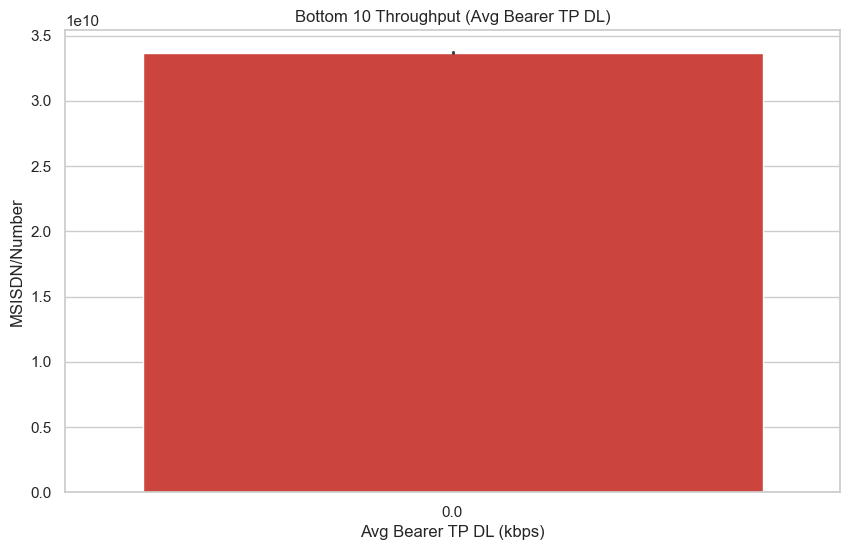

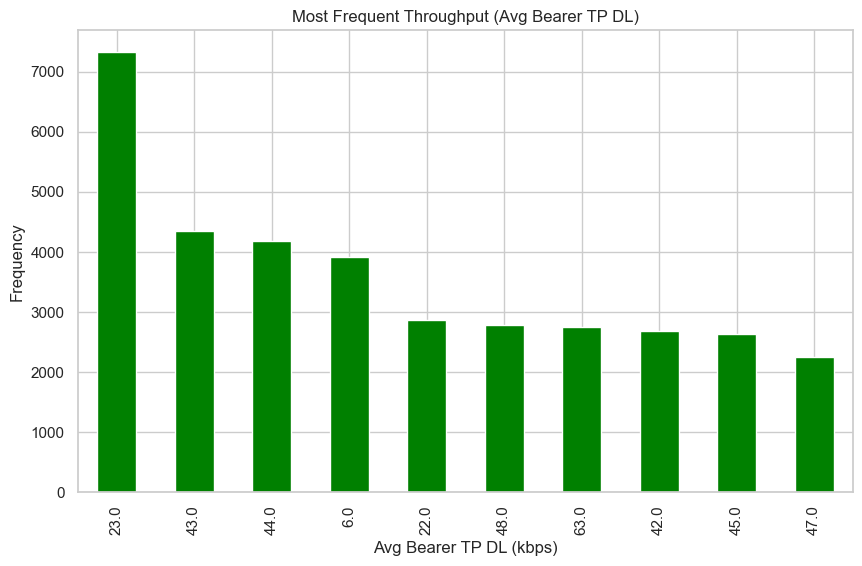

In [10]:
visualize_throughput(df)

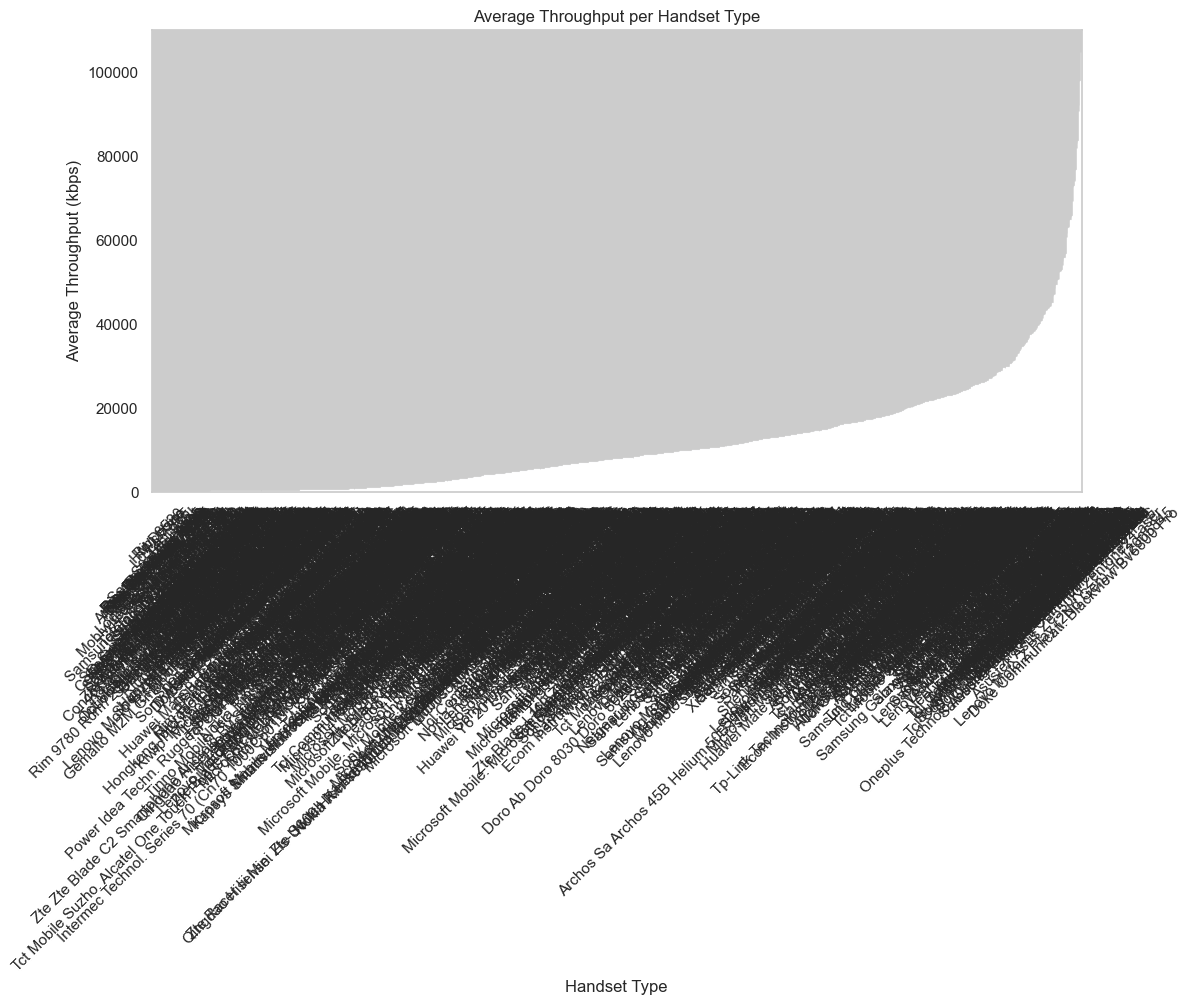

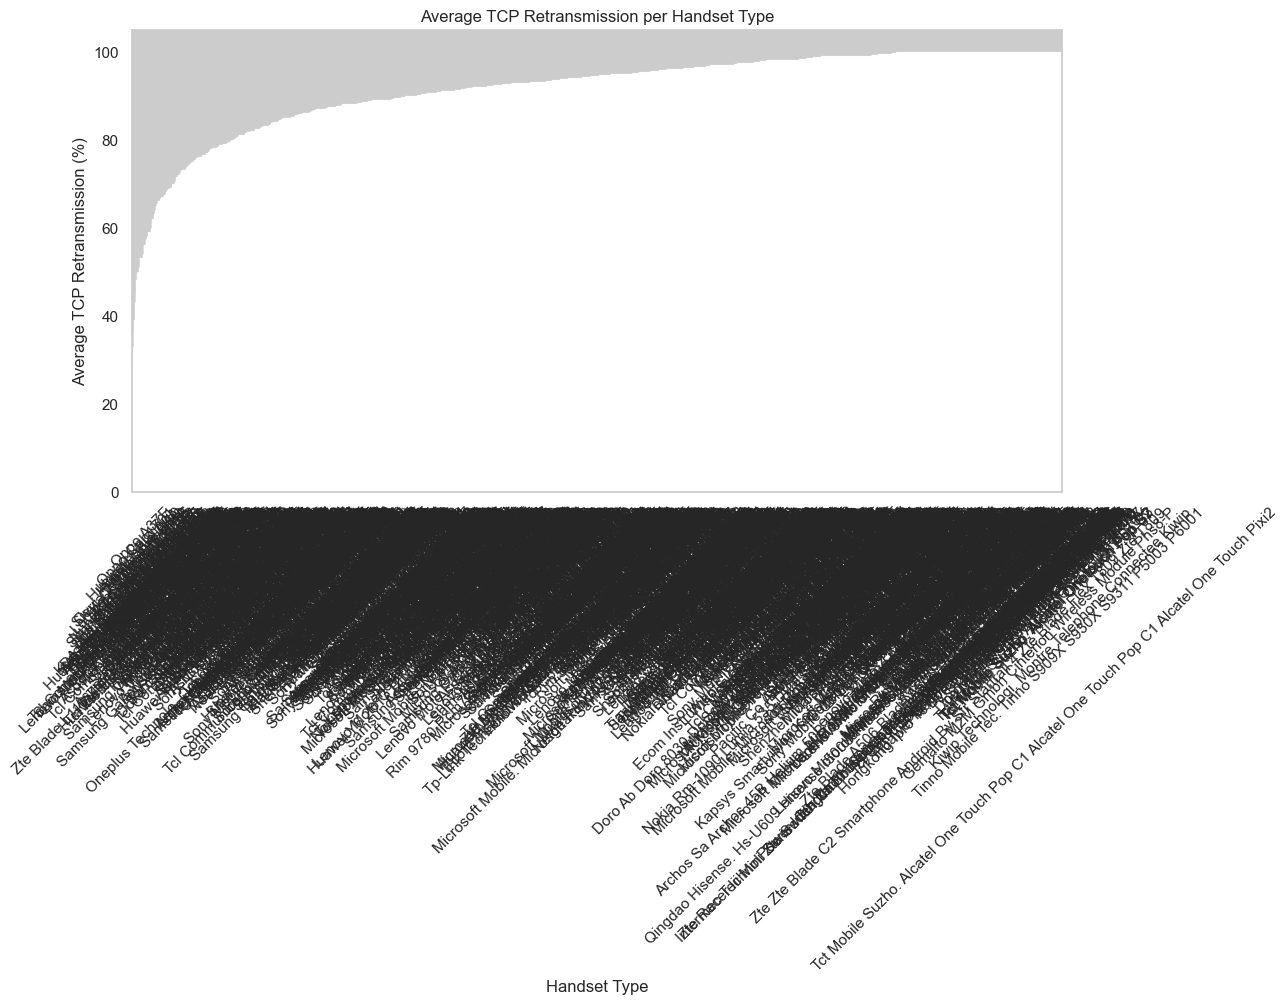

In [11]:
visualize_throughput_and_tcp_per_handset(df)

In [12]:
process_and_cluster_customers(df)

Cluster 0:
       MSISDN/Number    Avg RTT DL    Avg RTT UL  Avg Throughput DL  \
count   8.789600e+04  87896.000000  87896.000000       87896.000000   
mean    4.758180e+10    121.798298     15.140491        3807.087359   
std     3.185853e+12    498.690601     78.446856        7032.908602   
min     3.360100e+10      0.000000      0.000000           0.000000   
25%     3.365053e+10     34.000000      3.000000          40.500000   
50%     3.366351e+10     55.000000      6.000000          59.000000   
75%     3.368310e+10    109.795706     17.662883        3995.125000   
max     8.823971e+14  32333.000000   7120.000000       31778.500000   

       Avg Throughput UL       Avg RTT  Avg Throughput  Cluster  
count       87896.000000  87896.000000    87896.000000  87896.0  
mean          503.687665     68.469395     2155.387512      0.0  
std          1312.830765    252.788222     3867.036279      0.0  
min             0.000000      0.000000        0.000000      0.0  
25%            46.5

,MSISDN/Number,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Handset Type,Avg RTT,Avg Throughput,Cluster
0,3.360100e+10,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,23.000000,38.0,0
1,3.360100e+10,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),15.500000,49.5,0
2,3.360100e+10,109.795706,17.662883,48.0,49.0,undefined,63.729294,48.5,0
3,3.360101e+10,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),42.000000,124.0,0
4,3.360101e+10,57.000000,2.500000,20197.5,8224.5,Apple iPhone Se (A1723),29.750000,14211.0,0
...,...,...,...,...,...,...,...,...,...
106347,3.379000e+10,42.000000,10.000000,9978.0,387.0,Huawei Honor 9 Lite,26.000000,5182.5,0
106348,3.379000e+10,34.000000,6.000000,68.0,48.0,Apple iPhone 8 Plus (A1897),20.000000,58.0,0
106349,3.197021e+12,109.795706,17.662883,1.0,0.0,Quectel Wireless. Quectel Ec25-E,63.729294,0.5,0
106350,3.370000e+14,109.795706,17.662883,11.0,22.0,Huawei B525S-23A,63.729294,16.5,0


In [13]:
df.to_csv('C:/Users/ephre/Documents/Telecommunication-dataset-analysis/Dashboard/User_Experience.csv', index=False)